In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader

from autoencoder import UNet_double
from data import CleanDataset, DataTransformer, NoiseGenerator


/opt/anaconda3/envs/voice_isolate_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


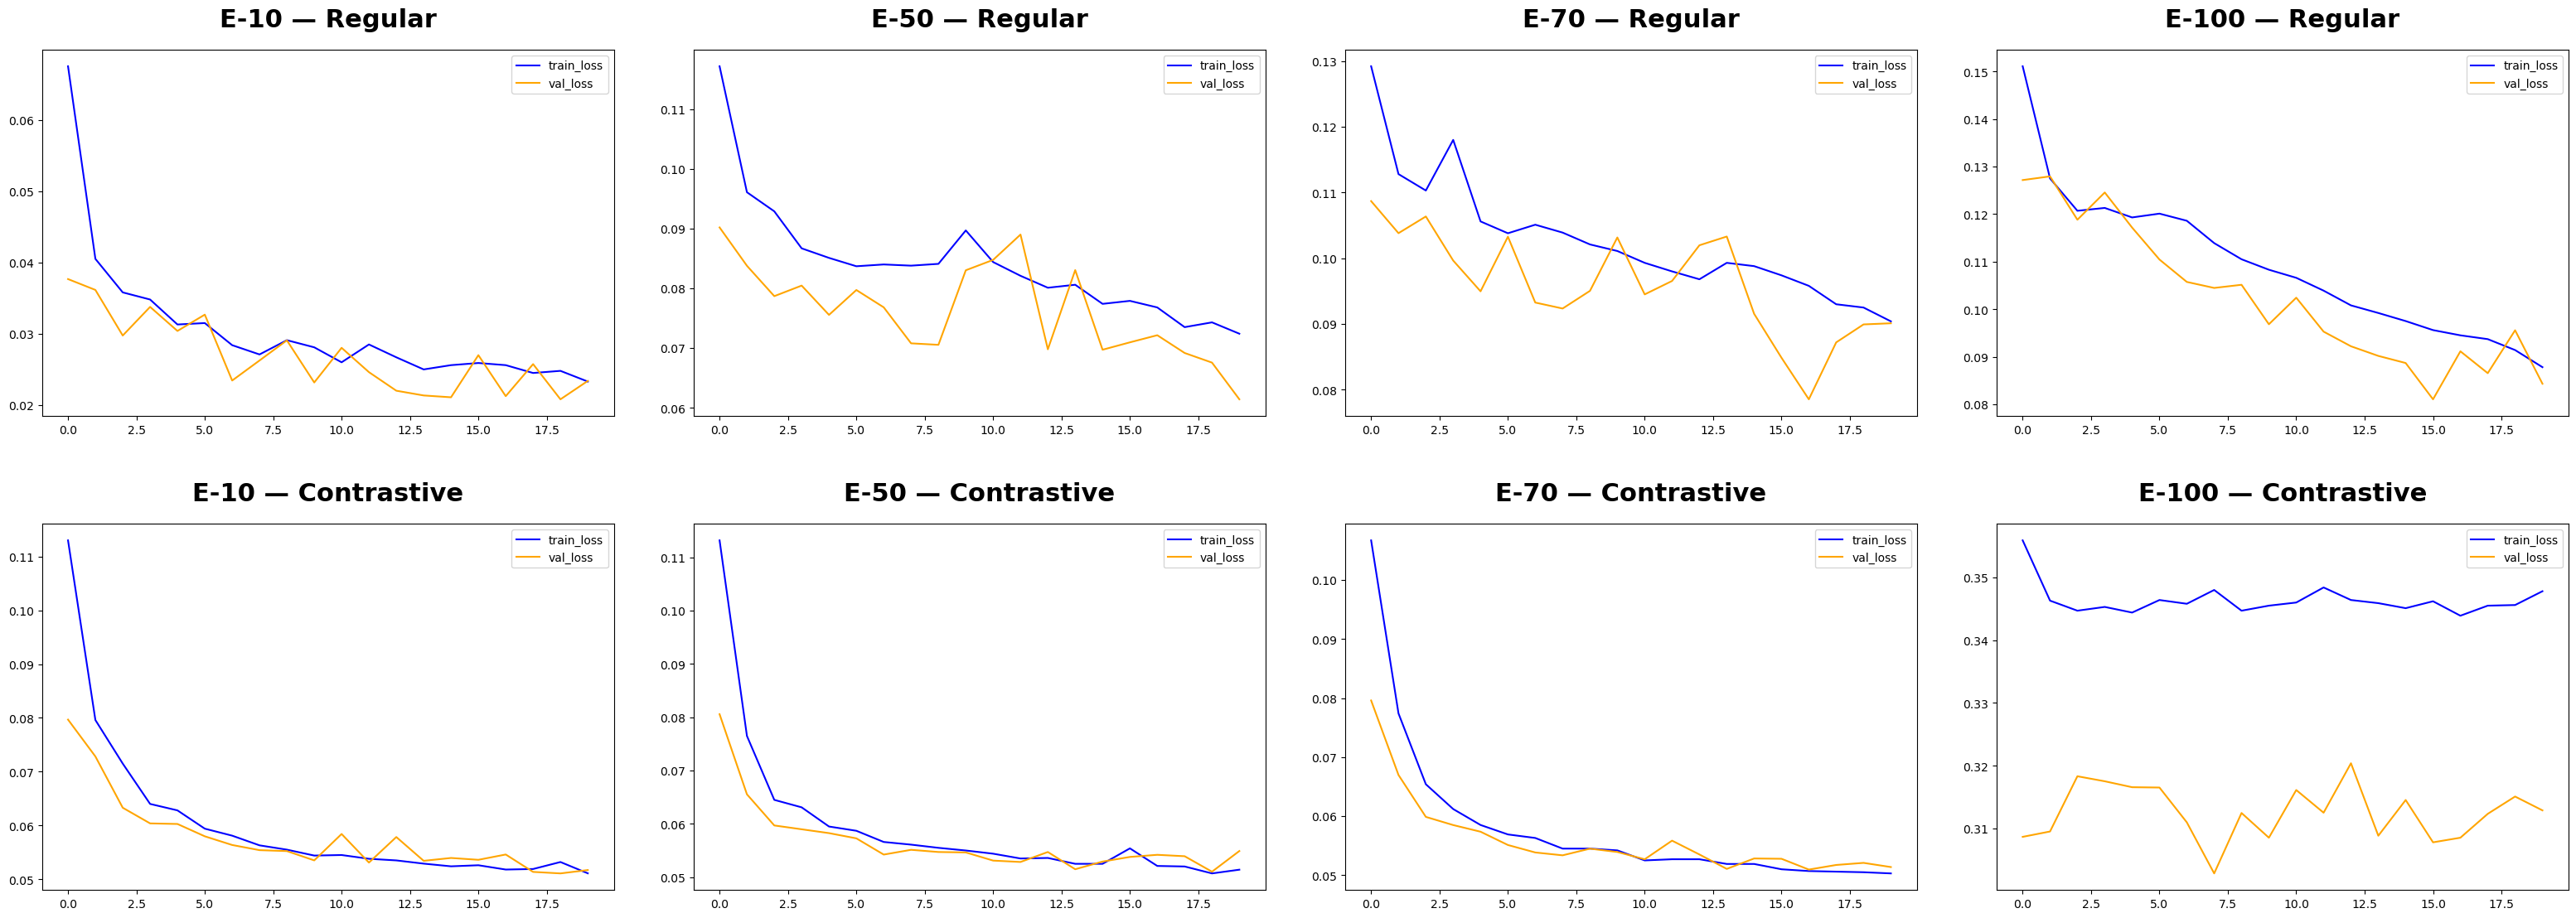

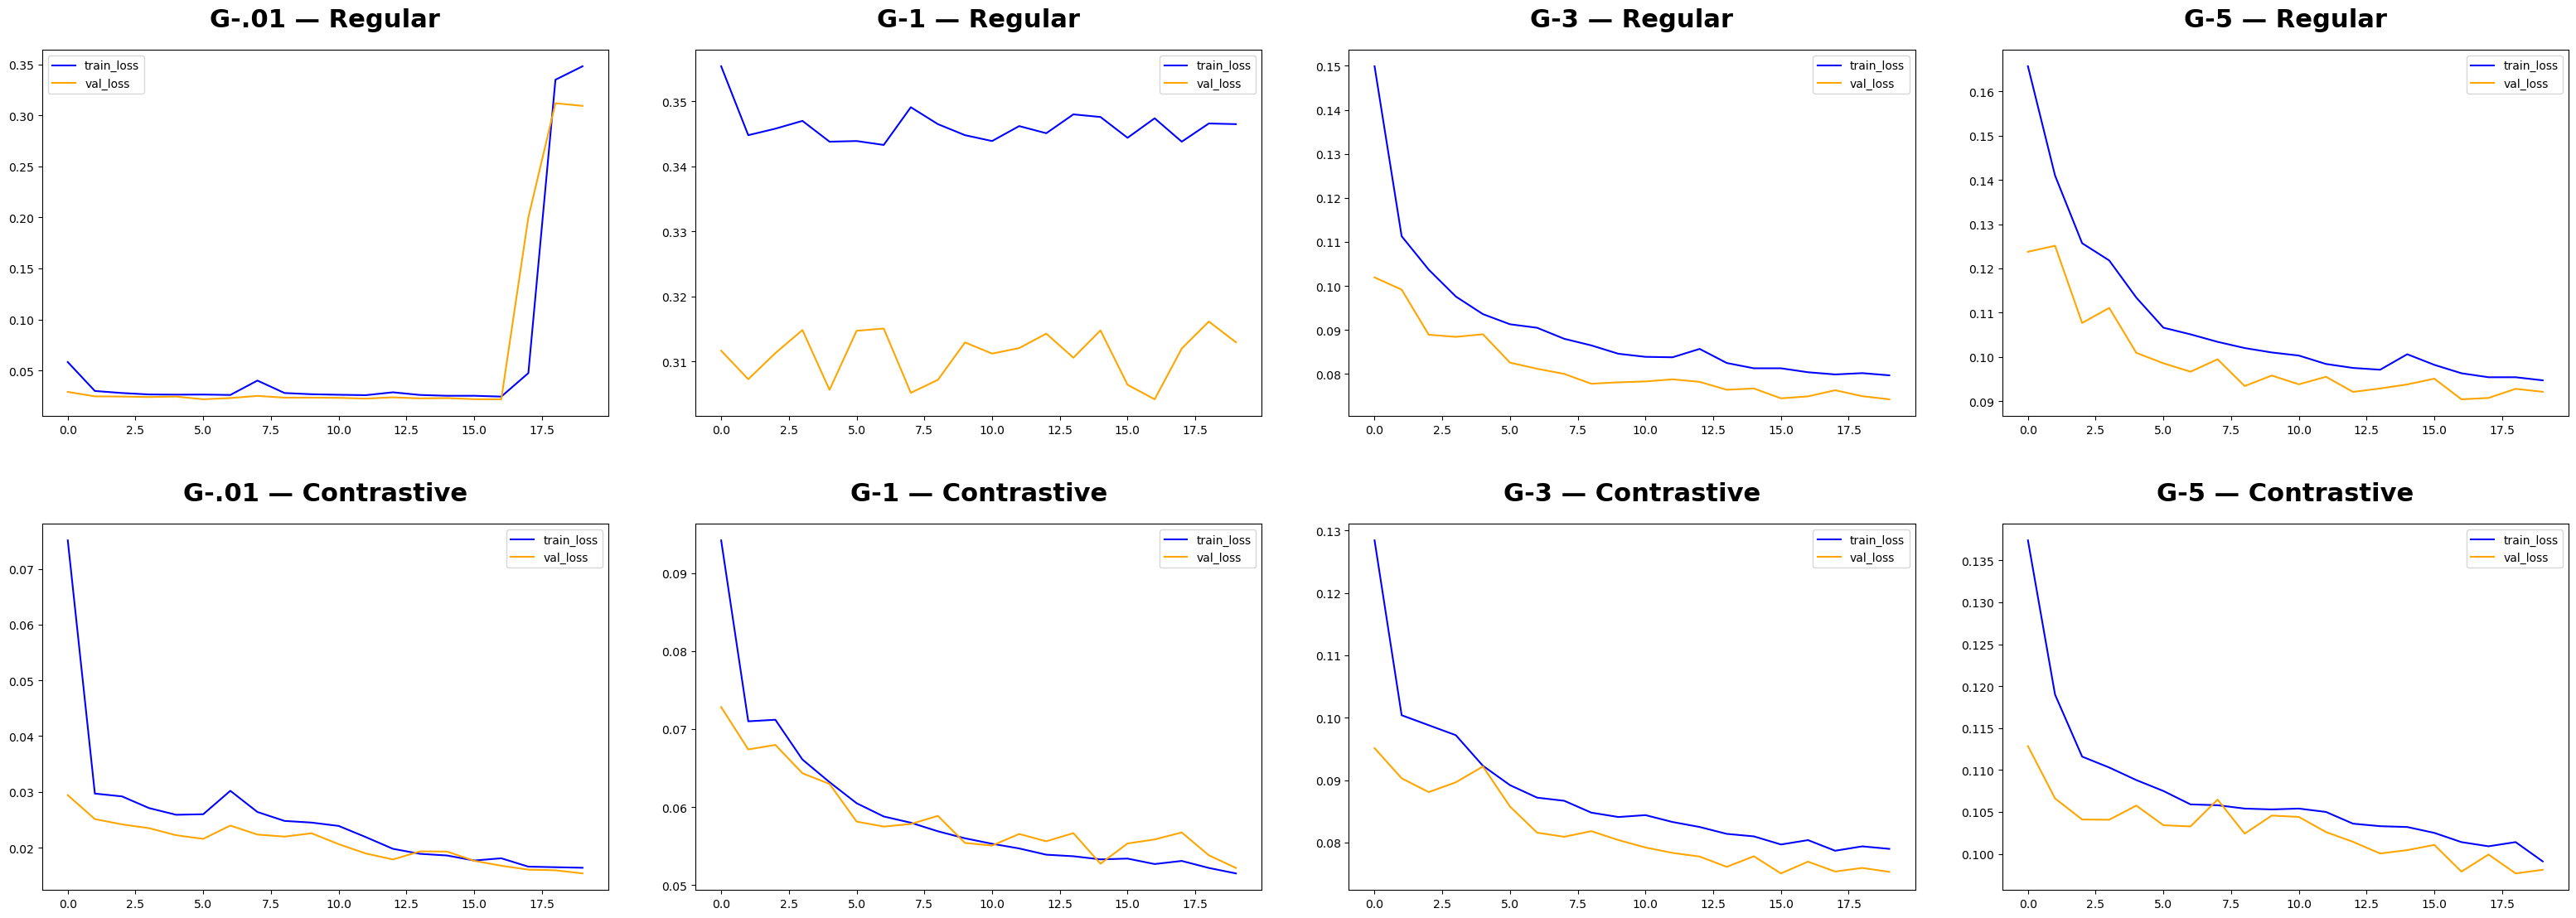

In [8]:
results_path = Path('../results/outputs_voice')
runs1 = {"E0-10": "E-10", "E0-50": "E-50", "E0-70": "E-70", "E0-100": "E-100"}
runs2 = {"G0-01": "G-.01", "G0-1": "G-1", "G0-3": "G-3", "G0-5": "G-5"}

def display(runs: dict[str, str], fname: Path):
    n = len(runs)
    fig, ax = plt.subplots(
        nrows=2, 
        ncols=n, 
        figsize=(8 * n, 12)   # Better scaling than 14*n x 20
    )

    title_font = 22

    for j, (run, run_title) in enumerate(runs.items()):
        # paths for each run
        run_path_reg   = results_path / 'regular' / run / "epoch_metrics.csv"
        run_path_contr = results_path / 'contrastive' / run / "reconstruction_post_contrastive_epoch_metrics.csv"

        # ==== TOP ROW: regular ====
        df = pd.read_csv(run_path_reg)
        ax[0, j].set_facecolor("white")
        ax[0, j].plot(
            [float(num[7:-1]) for num in df['loss']],
            label="train_loss",
            color = 'blue'
        )
        ax[0, j].plot(
            df['val_loss'],
            label="val_loss",
            color = 'orange'
        )
        # ax[1, j].imshow(img)
        ax[0, j].set_title(
            f"{run_title} — Regular",
            fontsize=title_font,
            fontweight='bold',
            pad=20
        )
        ax[0, j].legend()


        # ==== BOTTOM ROW: contr ====
        if run_path_contr.exists():
            df = pd.read_csv(run_path_contr)
            ax[1, j].set_facecolor("white")
            ax[1, j].plot(
                [float(num[7:-1]) for num in df['train_reconstruction_loss']],
                label="train_loss",
                color = 'blue'
            )
            ax[1, j].plot(
                [float(num) for num in df['val_reconstruction_loss']],
                label="val_loss",
                color = 'orange'
            )
            # ax[1, j].imshow(img)
            ax[1, j].set_title(
                f"{run_title} — Contrastive",
                fontsize=title_font,
                fontweight='bold',
                pad=20
            )
            ax[1, j].legend()
        # ax[1, j].axis("off")

    plt.tight_layout(pad=4.0)
    plt.show()
    fig.savefig(fname, dpi=200, bbox_inches='tight')


display(runs1, results_path / 'Environment.png')
display(runs2, results_path / 'Gaussian.png')

# Display Conrtastive

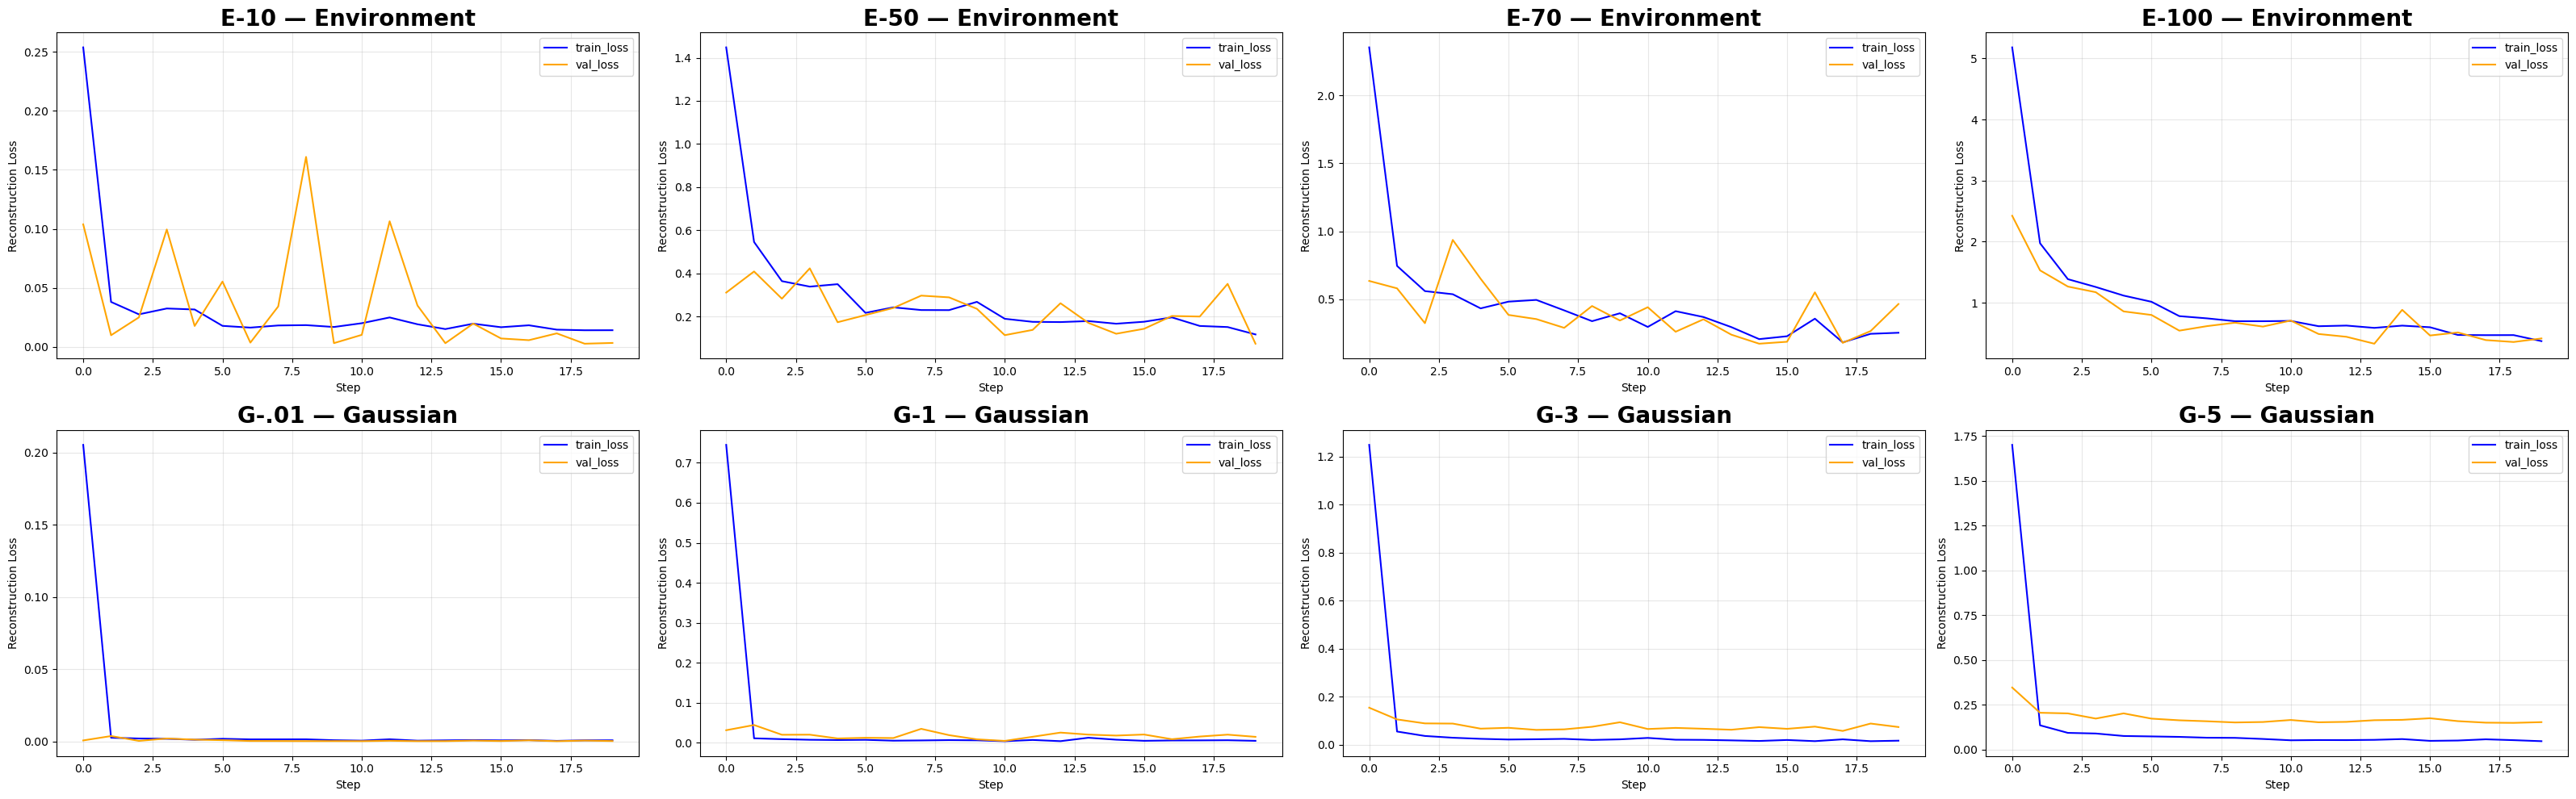

In [9]:
runs1 = {"E0-10": "E-10", "E0-50": "E-50", "E0-70": "E-70", "E0-100": "E-100"}
runs2 = {"G0-01": "G-.01", "G0-1": "G-1", "G0-3": "G-3", "G0-5": "G-5"}

n = len(runs1)

fig, ax = plt.subplots(
    nrows=2,
    ncols=n,
    figsize=(8 * n, 10)
)

# Force white background
plt.style.use("default")
fig.patch.set_facecolor("white")

# Iterate column-by-column
for j, ((run1, title1), (run2, title2)) in enumerate(zip(runs1.items(), runs2.items())):

    # ---------- TOP ROW: Environment ----------
    env_path = results_path / "contrastive" / run1 / "contrastive_epoch_metrics.csv"
    if env_path.exists():
        df1 = pd.read_csv(env_path)
        ax[0, j].plot(df1.index, df1["train_loss"], label="train_loss", color = 'blue')
        ax[0, j].plot(df1.index, df1["val_loss"], label="val_loss", color = 'orange')

    ax[0, j].set_title(f"{title1} — Environment", fontsize=20, fontweight="bold")
    ax[0, j].set_facecolor("white")
    ax[0, j].grid(True, alpha=0.3)
    ax[0, j].set_xlabel("Step")
    ax[0, j].set_ylabel("Reconstruction Loss")
    ax[0, j].legend()

    # ---------- BOTTOM ROW: Gaussian ----------
    gauss_path = results_path / "contrastive" / run2 / "contrastive_epoch_metrics.csv"
    if gauss_path.exists():
        df2 = pd.read_csv(gauss_path)
        ax[1, j].plot(df2.index, df2["train_loss"], label="train_loss", color = 'blue')
        ax[1, j].plot(df2.index, df2["val_loss"], label="val_loss", color = 'orange')

    ax[1, j].set_title(f"{title2} — Gaussian", fontsize=20, fontweight="bold")
    ax[1, j].set_facecolor("white")
    ax[1, j].grid(True, alpha=0.3)
    ax[1, j].set_xlabel("Step")
    ax[1, j].set_ylabel("Reconstruction Loss")
    ax[1, j].legend()
    fig.savefig(results_path / 'ContrastiveLoss.png')

plt.tight_layout()
plt.show()

